Vyron-Georgios Anemogiannis 1115202000008  \
Georgios-Alexandros Vasilakopoulos 1115202000018

Assignment Written Locally

In [233]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [234]:
df = pd.read_csv('books_1.Best_Books_Ever.csv')


In [235]:
# I care only about English books that have a description (For the recommendation system)
print(len(df))

df = df[df['language'] == 'English']
df = df[df['description'].notna()]



print(len(df))


52478
42151


# Preprocessing

In [236]:
def convert_to_list(row):
    return eval(row)

df['ratingsByStars'] = df['ratingsByStars'].apply(convert_to_list)

# create 5 new columns for each star rating or nan if nan

df['1_star'] = df['ratingsByStars'].apply(lambda x: x[0] if len(x) > 0 else np.nan)
df['2_star'] = df['ratingsByStars'].apply(lambda x: x[1] if len(x) > 1 else np.nan)
df['3_star'] = df['ratingsByStars'].apply(lambda x: x[2] if len(x) > 2 else np.nan)
df['4_star'] = df['ratingsByStars'].apply(lambda x: x[3] if len(x) > 3 else np.nan)
df['5_star'] = df['ratingsByStars'].apply(lambda x: x[4] if len(x) > 4 else np.nan)

df['1_star'] 
    

0        3444695
1        1593642
2        2363896
3        1617567
4        1751460
5        1048230
6         986764
7         254964
8          78217
9         602138
10       1784471
11        725771
12        556142
13        483222
14        645308
15        712950
16        382985
17        183179
18        746070
19        332692
20        612098
21       1409189
22        617568
23        616589
24        805221
25        315090
26        599617
27       1345866
28        745774
29        603209
30       1300564
31        379818
32       4578137
33        765471
34        667602
35        634457
36        611265
37        345260
38        527202
39        361401
40        937208
41        403082
42       1006885
43        381307
44        624406
45        425481
46       1231600
47        348906
48        614520
49        396850
50        434637
51        345538
52        265910
53        464957
54        277631
55        545209
56        236731
57        475782
58        3507

In [237]:
df['genres'] = df['genres'].apply(convert_to_list)
df['genreSingle'] = df['genres'].apply(lambda x: x[0] if len(x) > 0 else np.nan)

df['genreSingle']

0                     Young Adult
1                         Fantasy
2                        Classics
3                        Classics
4                     Young Adult
5              Historical Fiction
6                        Classics
7                         Fantasy
8                         Fantasy
9                        Classics
10                    Young Adult
11                Science Fiction
12                      Childrens
13                       Classics
14                        Fiction
15                        Fiction
16                       Classics
17                       Classics
18                       Classics
19                       Classics
20                       Classics
21                    Young Adult
22                       Classics
23                       Classics
24                        Fiction
25                       Classics
26                    Young Adult
27                       Classics
28                        Fantasy
29            

In [238]:

df['publishYear'] = pd.to_datetime(df['publishDate'], errors='coerce').dt.year.astype('Int64')

print(df['publishYear'])

0        2008
1        2004
2        2006
3        2000
4        2006
5        2006
6        1996
7        2002
8        2012
9        1999
10       2012
11       2007
12       2064
13       2002
14       2006
15       2005
16       2004
17       2000
18       2003
19       1987
20       2011
21       2012
22       1999
23       2004
24       2014
25       2002
26       1999
27       2004
28       2007
29       2004
30       2009
31       2003
32       2003
33       2000
34       2001
35       2002
36       2013
37       1986
38       1998
39       2003
40       2001
41       2003
42       2006
43       1998
44       2007
45       2017
46       2005
47       2002
48       2006
49       1997
50       2000
51       1988
52       2006
53       2006
54       2003
55       2007
56       1995
57       1999
58       2018
59       2004
60       1998
61       2006
62       2004
63       2019
64       2002
65       1990
66       1998
67       1975
68       1998
69       2004
70       2006
71    

# Questions on data

## Question 1

<AxesSubplot: >

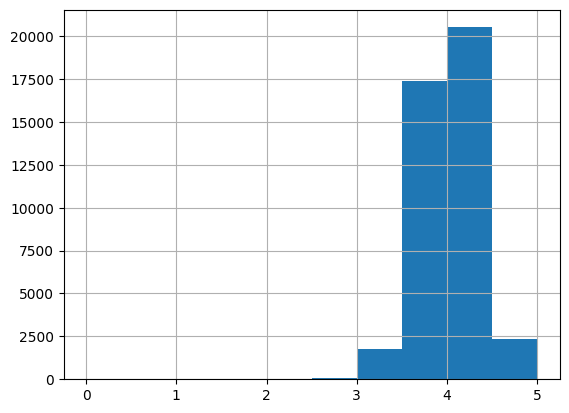

In [239]:
df['rating'].hist()


## Question 2

In [240]:
df['pages'] = pd.to_numeric(df['pages'], errors='coerce').astype('Int64')

Q2 = df.sort_values(by=['pages'], ascending=False).head(10)
Q2 = Q2[['title', 'pages']]
Q2



title  pages
11490                          The Story of Civilization  14777
22960                         The Complete Wheel of Time  11095
8374             The Complete Malazan Book of the Fallen   8258
5098                                           Animorphs   8245
20098                                          Homestuck   8124
3148                                                Worm   6680
4692      The Complete Aubrey/Maturin Novels (5 Volumes)   6576
1679                              A Song of Ice and Fire   5216
38814  One Piece Box Set 3: Thriller Bark to New Worl...   5056
38247  One Piece Box Set 2: Skypeia and Water Seven: ...   4936

## Question 3

In [242]:
df['5_star'] = pd.to_numeric(df['5_star'], errors='coerce').astype('Int64')

Q3 = df[df['5_star'] > 10000]
Q3 = Q3.sort_values(by=['5_star'], ascending=False).head(10)
Q3 = Q3[['title', '5_star']]
Q3

title  5_star
4                                  Twilight  548674
192                    Fifty Shades of Grey  228885
40                   The Catcher in the Rye  139016
1201                               New Moon  121711
22                        Lord of the Flies  120835
32    Harry Potter and the Sorcerer's Stone  118525
1116                          Breaking Dawn  117129
158                         Eat, Pray, Love  112573
27                         The Great Gatsby  112144
24                            The Alchemist  102377

## Question 5

In [243]:
Q4 = df.groupby('author')['title'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
Q4

author  count
15876     Nora Roberts (Goodreads Author)     85
259                       Agatha Christie     69
19605     Stephen King (Goodreads Author)     62
2040     Bella Forrest (Goodreads Author)     49
14488        Meg Cabot (Goodreads Author)     49
6161                          Erin Hunter     49
11304  Karen Kingsbury (Goodreads Author)     48
20365                     Terry Pratchett     48
14640                     Mercedes Lackey     45
6024                          Enid Blyton     43

## Question 6

In [244]:

df['numRatings'] = pd.to_numeric(df['numRatings'], errors='coerce').astype('Int64')

Q5 = df.groupby('author')['numRatings'].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).head(10)
Q5

author       sum
8544   J.K. Rowling, Mary GrandPré (Illustrator)  17790643
19974                            Suzanne Collins  11654607
19654                            Stephenie Meyer  10710870
19605            Stephen King (Goodreads Author)  10025253
17597            Rick Riordan (Goodreads Author)   8111644
4237                Dan Brown (Goodreads Author)   7014203
8609                              J.R.R. Tolkien   6620587
8542                                J.K. Rowling   6462880
10345              John Green (Goodreads Author)   6355092
3119          Cassandra Clare (Goodreads Author)   5637877